In [168]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [169]:
data = pd.read_csv("Cancer_Data.csv")
data = data.drop("Unnamed: 32", axis=1)

In [170]:
id = data["id"]
data = data.drop("id", axis=1)

In [171]:
encoder_ = LabelEncoder()
encoder_.fit(data["diagnosis"])
data["diagnosis"] = encoder_.transform(data["diagnosis"])

In [172]:
y_data = data["diagnosis"].values
x_data = data.drop("diagnosis", axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify= y_data)

In [173]:
# model = Sequential()

# model.add(Dense(30, activation="relu"))
# model.add(Dense(15, activation="relu"))
# model.add(Dense(15, activation="relu"))
# model.add(Dense(15, activation="relu"))
# model.add(Dense(15, activation="relu"))
# model.add(Dense(15, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))

# model.compile(loss="binary_crossentropy", optimizer="adam")

# es = EarlyStopping(monitor="val_loss", mode="min", patience=30, verbose=1)

# model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[es], epochs=1000, verbose=1)


model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

es = EarlyStopping(monitor="val_loss", mode="min", patience=30, verbose=1)

model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[es], epochs=1000, verbose=1)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.7165 - val_loss: 0.7141
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6961 - val_loss: 0.5984
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5891 - val_loss: 0.4917
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4575 - val_loss: 0.5392
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4212 - val_loss: 0.3740
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3612 - val_loss: 0.4290
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3376 - val_loss: 0.3138
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3013 - val_loss: 0.4813
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3275 - val_loss: 0.2689
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2610 - val_loss: 0.2690
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2811 - val_loss: 0.2747
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [174]:
model.save("cancerClassification.h5")

<Axes: >

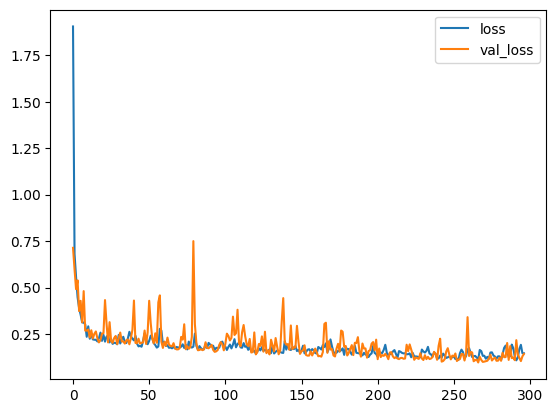

In [175]:
loss_graph = pd.DataFrame(model.history.history)
loss_graph.plot()

In [176]:
predictss = (model.predict(x_test)>0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [177]:
print(f"""
cr = {classification_report(y_true=y_test, y_pred= predictss)}
cm =\n {confusion_matrix(y_true=y_test, y_pred= predictss)}
as = {accuracy_score(y_true=y_test, y_pred= predictss)}
""")


cr =               precision    recall  f1-score   support

           0       0.90      1.00      0.95       107
           1       1.00      0.81      0.90        64

    accuracy                           0.93       171
   macro avg       0.95      0.91      0.92       171
weighted avg       0.94      0.93      0.93       171

cm =
 [[107   0]
 [ 12  52]]
as = 0.9298245614035088



In [178]:
# ma = confusion_matrix(y_test, predictss)
# pd.DataFrame(ma , columns=["Pred FALSE", "Pred TRUE"], index=["Abs False","Abs TRUE"])

In [179]:
y_test = encoder_.inverse_transform(y_test)
predictss = encoder_.inverse_transform(predictss)

results = pd.DataFrame(y_test, columns=["predictions"])
results["true values"] = predictss

C:\Users\meren\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [180]:
results

,predictions,true values
0,B,B
1,B,B
2,B,B
3,B,B
4,B,B
...,...,...
166,B,B
167,M,B
168,M,B
169,B,B


In [181]:
results.to_excel("cancer_classification_results.xlsx", engine='openpyxl')